## 🌐 Leveraging APIs for Real-Time Cryptocurrency Data 🚀

In [28]:
import requests
import json
import pandas as pd
from datetime import datetime

url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',  
    'order': 'market_cap_desc', 
    'per_page': 10, 
    'page': 1,  
    'sparkline': 'false', 
    'price_change_percentage': '1h,24h,7d' 
}

# Fetching data from the API
response = requests.get(url, params=params)
data = response.json()

# Saving data into a list
cryptos = []
for coin in data:
    cryptos.append({
        'Name': coin['name'],
        'Symbol': coin['symbol'],
        'Current Price (USD)': coin['current_price'],
        'Market Cap (USD)': coin['market_cap'],
        '24h Volume (USD)': coin['total_volume'],
        '24h Price Change (%)': coin['price_change_percentage_24h'],
        '1h Price Change (%)': coin.get('price_change_percentage_1h_in_currency', 'N/A'),  
        '7d Price Change (%)': coin.get('price_change_percentage_7d_in_currency', 'N/A')   
    })

# Converting list data into a DataFrame
df = pd.DataFrame(cryptos)

# Add a timestamp for reference
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df['Timestamp'] = timestamp

# Saving Data into a .CSV file
df.to_csv(r'C:\Users\LOGIN-SOLUTIOn\Documents\Data_Analyst\DataSets_+sql\csv_files\crypto_prices.csv', index=False)

In [29]:
df

,Name,Symbol,Current Price (USD),Market Cap (USD),24h Volume (USD),24h Price Change (%),1h Price Change (%),7d Price Change (%),Timestamp
0,Bitcoin,btc,54483.0000,1075187640115,15883950007,0.2681,0.2375,-6.3021,2024-09-09 00:23:42
1,Ethereum,eth,2278.6500,273942163402,8765909310,-0.3038,0.1920,-7.7962,2024-09-09 00:23:42
2,Tether,usdt,1.0000,118229090853,22321798812,-0.0473,0.0324,-0.0800,2024-09-09 00:23:42
3,BNB,bnb,496.8700,72435141700,562679047,0.3744,-0.0399,-4.3555,2024-09-09 00:23:42
4,Solana,sol,128.9400,60291985263,1498975516,0.8911,0.0746,-2.9888,2024-09-09 00:23:42
5,USDC,usdc,1.0000,34969582828,3450491877,0.0259,0.0470,0.0640,2024-09-09 00:23:42
6,XRP,xrp,0.5267,29666155022,500700331,-0.4544,0.1811,-5.1548,2024-09-09 00:23:42
7,Lido Staked Ether,steth,2274.5800,22313070898,62604944,-0.3998,0.1025,-8.0373,2024-09-09 00:23:42
8,Dogecoin,doge,0.0956,13920346703,413352450,0.7889,0.3276,-2.3954,2024-09-09 00:23:42
9,TRON,trx,0.1531,13271595168,407082761,1.1319,0.1204,-2.2897,2024-09-09 00:23:42


#                                               Automating Cryptocurrency Data Retrieval

In [32]:
import pandas as pd
import requests
import json
from datetime import datetime


df = pd.DataFrame()

def API_Runner():
    global df  

    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        'vs_currency': 'usd',  
        'order': 'market_cap_desc', 
        'per_page': 10,  
        'page': 1, 
        'sparkline': 'false', 
        'price_change_percentage': '1h,24h,7d' 
    }
    
    # Fetch data from the API
    response = requests.get(url, params=params)
    data = response.json()
    
    # Saving data into a list
    cryptos = []
    for coin in data:
        cryptos.append({
            'Name': coin['name'],
            'Symbol': coin['symbol'],
            'Current Price (USD)': coin['current_price'],
            'Market Cap (USD)': coin['market_cap'],
            '24h Volume (USD)': coin['total_volume'],
            '24h Price Change (%)': coin['price_change_percentage_24h'],
            '1h Price Change (%)': coin.get('price_change_percentage_1h_in_currency', 'N/A'),  # 1h change
            '7d Price Change (%)': coin.get('price_change_percentage_7d_in_currency', 'N/A')   # 7d change
        })
    
    # Converting list data into a DataFrame
    df = pd.DataFrame(cryptos)
    
    # Add a timestamp for reference
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    df['Timestamp'] = timestamp

   # Save the dataframe to a CSV file or perform other operations as needed
    if not os.path.isfile(r'C:\Users\LOGIN-SOLUTIOn\Documents\Data_Analyst\DataSets_+sql\csv_files\crypto_prices.csv'):
        df.to_csv(r'C:\Users\LOGIN-SOLUTIOn\Documents\Data_Analyst\DataSets_+sql\csv_files\crypto_prices.csv',index=False)
    else:
        df.to_csv(r'C:\Users\LOGIN-SOLUTIOn\Documents\Data_Analyst\DataSets_+sql\csv_files\crypto_prices.csv',mode='a',header=False,index=False)


In [33]:
import os 
from datetime import datetime
from time import time
from time import sleep

for i in range(3):     # 333 is the limit of using this API in a day!
    API_Runner()
    print("Run Sucessfully")
    sleep(12) 

exit()

Run Sucessfully
Run Sucessfully
Run Sucessfully


In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\LOGIN-SOLUTIOn\Documents\Data_Analyst\DataSets_+sql\csv_files\crypto_prices.csv')

In [ ]:
df['1h Volume ']

In [2]:
pd.set_option('display.float_format',lambda x: '%.4f' % x)      # Setting all float values upto 4 decimals

In [3]:
df

,Name,Symbol,Current Price (USD),Market Cap (USD),24h Volume (USD),24h Price Change (%),1h Price Change (%),7d Price Change (%),Timestamp
0,Bitcoin,btc,54483.0000,1075187640115,15883950007,0.2681,0.2375,-6.3021,2024-09-09 00:23:42
1,Ethereum,eth,2278.6500,273942163402,8765909310,-0.3038,0.1920,-7.7962,2024-09-09 00:23:42
2,Tether,usdt,1.0000,118229090853,22321798812,-0.0473,0.0324,-0.0800,2024-09-09 00:23:42
3,BNB,bnb,496.8700,72435141700,562679047,0.3744,-0.0399,-4.3555,2024-09-09 00:23:42
4,Solana,sol,128.9400,60291985263,1498975516,0.8911,0.0746,-2.9888,2024-09-09 00:23:42
5,USDC,usdc,1.0000,34969582828,3450491877,0.0259,0.0470,0.0640,2024-09-09 00:23:42
6,XRP,xrp,0.5267,29666155022,500700331,-0.4544,0.1811,-5.1548,2024-09-09 00:23:42
7,Lido Staked Ether,steth,2274.5800,22313070898,62604944,-0.3998,0.1025,-8.0373,2024-09-09 00:23:42
8,Dogecoin,doge,0.0956,13920346703,413352450,0.7889,0.3276,-2.3954,2024-09-09 00:23:42
9,TRON,trx,0.1531,13271595168,407082761,1.1319,0.1204,-2.2897,2024-09-09 00:23:42


In [4]:
df.columns

Index(['Name', 'Symbol', 'Current Price (USD)', 'Market Cap (USD)',
       '24h Volume (USD)', '24h Price Change (%)', '1h Price Change (%)',
       '7d Price Change (%)', 'Timestamp'],
      dtype='object')

In [15]:
df2 = df.groupby('Name',sort=False)[['1h Price Change (%)','24h Price Change (%)','7d Price Change (%)']].mean()
df2

,1h Price Change (%),24h Price Change (%),7d Price Change (%)
Name,,,
Bitcoin,0.2375,0.2681,-6.3021
Ethereum,0.1920,-0.3038,-7.7962
Tether,0.0324,-0.0473,-0.0800
BNB,-0.0399,0.3744,-4.3555
Solana,0.0746,0.8911,-2.9888
USDC,0.0470,0.0259,0.0640
XRP,0.1811,-0.4544,-5.1548
Lido Staked Ether,0.1025,-0.3998,-8.0373
Dogecoin,0.3276,0.7889,-2.3954


In [16]:
df3 = df2.stack()
df3

Name                                   
Bitcoin            1h Price Change (%)     0.2375
                   24h Price Change (%)    0.2681
                   7d Price Change (%)    -6.3021
Ethereum           1h Price Change (%)     0.1920
                   24h Price Change (%)   -0.3038
                   7d Price Change (%)    -7.7962
Tether             1h Price Change (%)     0.0324
                   24h Price Change (%)   -0.0473
                   7d Price Change (%)    -0.0800
BNB                1h Price Change (%)    -0.0399
                   24h Price Change (%)    0.3744
                   7d Price Change (%)    -4.3555
Solana             1h Price Change (%)     0.0746
                   24h Price Change (%)    0.8911
                   7d Price Change (%)    -2.9888
USDC               1h Price Change (%)     0.0470
                   24h Price Change (%)    0.0259
                   7d Price Change (%)     0.0640
XRP                1h Price Change (%)     0.1811
          

In [17]:
df4 = df3.to_frame(name='Values')
df4

Values
Name                                          
Bitcoin           1h Price Change (%)   0.2375
                  24h Price Change (%)  0.2681
                  7d Price Change (%)  -6.3021
Ethereum          1h Price Change (%)   0.1920
                  24h Price Change (%) -0.3038
                  7d Price Change (%)  -7.7962
Tether            1h Price Change (%)   0.0324
                  24h Price Change (%) -0.0473
                  7d Price Change (%)  -0.0800
BNB               1h Price Change (%)  -0.0399
                  24h Price Change (%)  0.3744
                  7d Price Change (%)  -4.3555
Solana            1h Price Change (%)   0.0746
                  24h Price Change (%)  0.8911
                  7d Price Change (%)  -2.9888
USDC              1h Price Change (%)   0.0470
                  24h Price Change (%)  0.0259
                  7d Price Change (%)   0.0640
XRP               1h Price Change (%)   0.1811
                  24h Price Change (%) -0.4544
                  7d Price Change (%)  -5.1548
Lido Staked Ether 1h Price Change (%)   0.1025
                  24h Price Change (%) -0.3998
                  7d Price Change (%)  -8.0373
Dogecoin          1h Price Change (%)   0.3276
                  24h Price Change (%)  0.7889
                  7d Price Change (%)  -2.3954
TRON              1h Price Change (%)   0.1204
                  24h Price Change (%)  1.1319
                  7d Price Change (%)  -2.2897

In [18]:
df4.count()  #couting total rows in all groups

Values    30
dtype: int64

In [19]:
df6 = df4.reset_index()   # Setting index
df6

,Name,level_1,Values
0,Bitcoin,1h Price Change (%),0.2375
1,Bitcoin,24h Price Change (%),0.2681
2,Bitcoin,7d Price Change (%),-6.3021
3,Ethereum,1h Price Change (%),0.1920
4,Ethereum,24h Price Change (%),-0.3038
5,Ethereum,7d Price Change (%),-7.7962
6,Tether,1h Price Change (%),0.0324
7,Tether,24h Price Change (%),-0.0473
8,Tether,7d Price Change (%),-0.0800
9,BNB,1h Price Change (%),-0.0399


In [20]:
df7 = df6.rename(columns={'level_1':'Price_Trend'})  #Renaming Column Name
df7

,Name,Price_Trend,Values
0,Bitcoin,1h Price Change (%),0.2375
1,Bitcoin,24h Price Change (%),0.2681
2,Bitcoin,7d Price Change (%),-6.3021
3,Ethereum,1h Price Change (%),0.1920
4,Ethereum,24h Price Change (%),-0.3038
5,Ethereum,7d Price Change (%),-7.7962
6,Tether,1h Price Change (%),0.0324
7,Tether,24h Price Change (%),-0.0473
8,Tether,7d Price Change (%),-0.0800
9,BNB,1h Price Change (%),-0.0399


In [21]:
df7['Price_Trend'] = df7['Price_Trend'].replace(['1h Price Change (%)','24h Price Change (%)','7d Price Change (%)'],['1h','24h','7D'])
df7

,Name,Price_Trend,Values
0,Bitcoin,1h,0.2375
1,Bitcoin,24h,0.2681
2,Bitcoin,7D,-6.3021
3,Ethereum,1h,0.1920
4,Ethereum,24h,-0.3038
5,Ethereum,7D,-7.7962
6,Tether,1h,0.0324
7,Tether,24h,-0.0473
8,Tether,7D,-0.0800
9,BNB,1h,-0.0399


# Visualizing Cryptocurrency Price Trends with Seaborn Point Plot

C:\Users\LOGIN-SOLUTIOn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


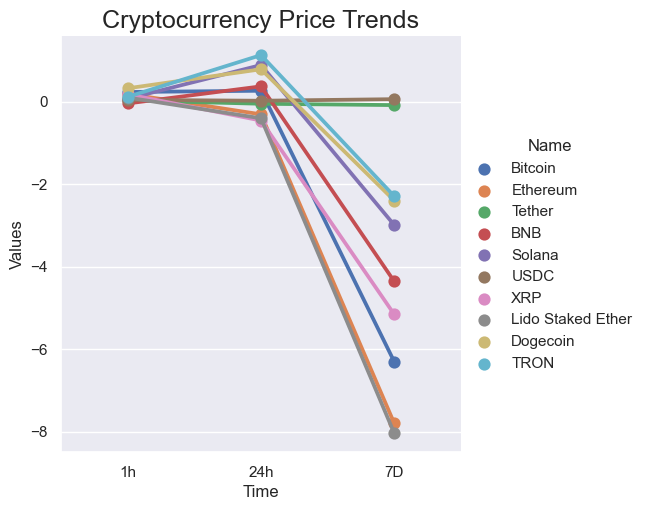

In [45]:
import seaborn as sb
import warnings
import matplotlib.pyplot as plt

sb.catplot(x='Price_Trend',y='Values',hue = 'Name',data=df7,kind='point')
plt.title(label='Cryptocurrency Price Trends',fontsize = 18, fontweight=2)
plt.xlabel('Time')
# warnings.filterwarnings("ignore", message=".*tight_layout.*")
# plt.tight_layout()
plt.show()

In [23]:
df.columns

Index(['Name', 'Symbol', 'Current Price (USD)', 'Market Cap (USD)',
       '24h Volume (USD)', '24h Price Change (%)', '1h Price Change (%)',
       '7d Price Change (%)', 'Timestamp'],
      dtype='object')

In [24]:
df8 = df[['Name','Current Price (USD)','Timestamp']]
df8

,Name,Current Price (USD),Timestamp
0,Bitcoin,54483.0000,2024-09-09 00:23:42
1,Ethereum,2278.6500,2024-09-09 00:23:42
2,Tether,1.0000,2024-09-09 00:23:42
3,BNB,496.8700,2024-09-09 00:23:42
4,Solana,128.9400,2024-09-09 00:23:42
5,USDC,1.0000,2024-09-09 00:23:42
6,XRP,0.5267,2024-09-09 00:23:42
7,Lido Staked Ether,2274.5800,2024-09-09 00:23:42
8,Dogecoin,0.0956,2024-09-09 00:23:42
9,TRON,0.1531,2024-09-09 00:23:42


In [29]:
df9 = df8.query("Name == 'Bitcoin'")
df9

,Name,Current Price (USD),Timestamp
0,Bitcoin,54483.0000,2024-09-09 00:23:42
10,Bitcoin,54483.0000,2024-09-09 00:24:36
20,Bitcoin,54483.0000,2024-09-09 00:24:48
30,Bitcoin,54483.0000,2024-09-09 00:25:01


# Line Plot of Cryptocurrency Prices Over Time

<Axes: xlabel='Timestamp', ylabel='Current Price (USD)'>

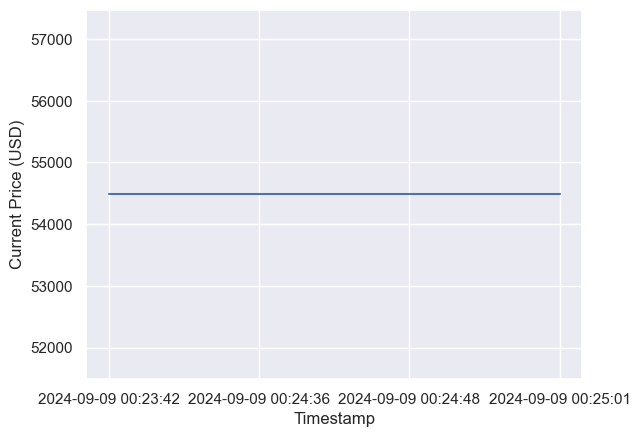

In [26]:
sb.set_theme(style="darkgrid")

sb.lineplot(x ='Timestamp', y ='Current Price (USD)', data = df9)